Data Preprocessing


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("/content/drive/MyDrive/spam.tsv",sep='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [34]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [12]:
ham.shape

(4825, 4)

In [13]:
spam.shape

(747, 4)

In [14]:
ham=ham.sample(spam.shape[0])

In [15]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [16]:
data=ham.append(spam,ignore_index=True)

<ipython-input-16-fb096279c7b2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam,ignore_index=True)


In [17]:
data.shape

(1494, 4)

In [18]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [19]:
data.head()

,label,message,length,punct
0,ham,Jus came back fr lunch wif my sis only. U leh?,46,2
1,ham,Carlos is down but I have to pick it up from h...,86,2
2,ham,"Fighting with the world is easy, u either win ...",149,4
3,ham,Well there's not a lot of things happening in ...,131,3
4,ham,"And stop wondering ""wow is she ever going to s...",135,10


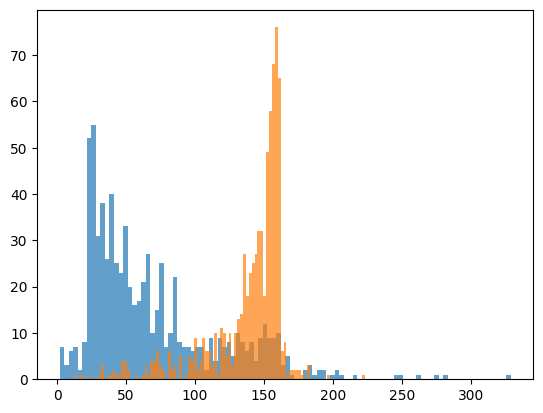

In [35]:
 plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
 plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
 plt.show()

In [21]:
data

,label,message,length,punct
0,ham,Jus came back fr lunch wif my sis only. U leh?,46,2
1,ham,Carlos is down but I have to pick it up from h...,86,2
2,ham,"Fighting with the world is easy, u either win ...",149,4
3,ham,Well there's not a lot of things happening in ...,131,3
4,ham,"And stop wondering ""wow is she ever going to s...",135,10
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=3,shuffle=True)

In [23]:
print(x_train.shape,x_test.shape)

(1045,) (449,)


Building the Model

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [25]:
classifier=Pipeline([("tfidf",TfidfVectorizer()),("classifer",RandomForestClassifier(n_estimators=100))])
classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifer', RandomForestClassifier())])

Predicting the result (Random Forest)

In [26]:
y_pred=classifier.predict(x_test)

In [27]:
y_test,y_pred

(70       ham
 804     spam
 269      ham
 85       ham
 1204    spam
         ... 
 386      ham
 235      ham
 122      ham
 95       ham
 210      ham
 Name: label, Length: 449, dtype: object,
 array(['ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
        'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam',
        'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
        'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
        'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
        'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham',
        'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 's

In [28]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


In [29]:
accuracy_score(y_test,y_pred)

0.9398663697104677

In [30]:
confusion_matrix(y_test,y_pred)

array([[234,   2],
       [ 25, 188]])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.95       236
        spam       0.99      0.88      0.93       213

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [32]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [33]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']
